<a href="https://colab.research.google.com/github/pratpar47/CS50/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nb_black

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from IPython.core.debugger import set_trace
%load_ext nb_black
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

plt.style.use(style="seaborn")
%matplotlib inline

<IPython.core.display.Javascript object>

In [ ]:
nifty_50 = pd.read_csv('/content/drive/MyDrive/data.csv',parse_dates=["Date"], index_col="Date")
nifty_50.head()


In [6]:
nifty_50.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Shares Traded        0
Turnover (Rs. Cr)    0
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
nifty_50.interpolate(method='time', inplace=True)

<IPython.core.display.Javascript object>

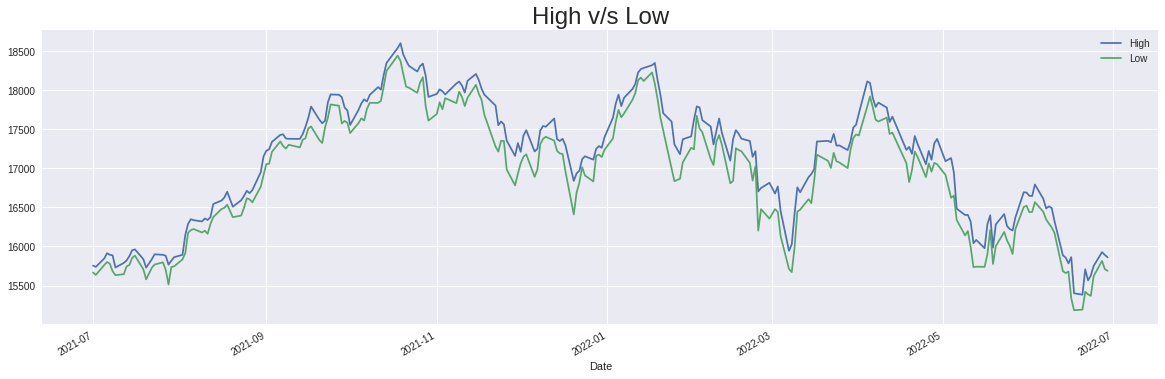

<IPython.core.display.Javascript object>

In [8]:
ax = nifty_50[['High', 'Low']].plot(figsize=(20, 6))
ax.set_title('High v/s Low', fontsize=24);

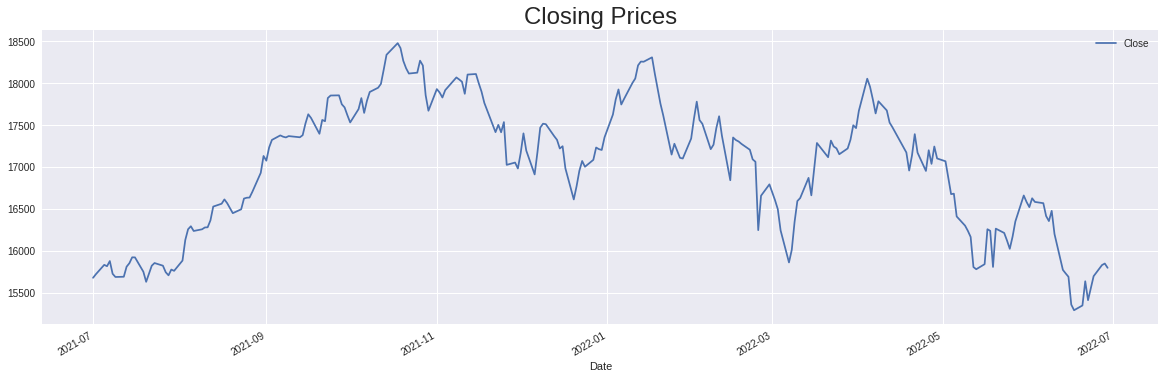

<IPython.core.display.Javascript object>

In [9]:
ax = nifty_50[['Close']].plot(figsize=(20, 6))
ax.set_title('Closing Prices', fontsize=24);

In [10]:
data = pd.read_csv("/content/drive/MyDrive/data.csv", parse_dates=["Date"], index_col = "Date",usecols=["Date","Open","High","Low","Close","Shares Traded","Turnover (Rs. Cr)"])
print(data.shape)
data.head()

(248, 6)


,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,17359.97
2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,18015.42
2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,14976.54
2021-07-06,15813.75,15914.20,15801.00,15818.25,391410742,24456.05
2021-07-07,15819.60,15893.55,15779.70,15879.65,329308646,22259.96


<IPython.core.display.Javascript object>

In [11]:
data.tail()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2022-06-23,15451.55,15628.45,15367.50,15556.65,259171810,21722.06
2022-06-24,15657.40,15749.25,15619.45,15699.25,219599372,18259.72
2022-06-27,15926.20,15927.45,15815.50,15832.05,210932505,17770.42
2022-06-28,15757.45,15892.10,15710.15,15850.20,251865155,18419.75
2022-06-29,15701.70,15861.60,15687.80,15799.10,444949551,22528.57


<IPython.core.display.Javascript object>

In [12]:
data = data.resample('D').mean()
data.isnull().sum()

Open                 116
High                 116
Low                  116
Close                116
Shares Traded        116
Turnover (Rs. Cr)    116
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
data.interpolate(method="time", inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
nifty_50 = nifty_50[["Close"]].copy()
nifty_50.describe()

Train Test split

In [15]:
n = int(len(nifty_50) * 0.8)
train = nifty_50.Close[ :n]
test = nifty_50.Close[n: ]

<IPython.core.display.Javascript object>

In [16]:
print(len(train))
print(len(test))

198
50


<IPython.core.display.Javascript object>

ADF test to test stationarity

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(nifty_50.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.9186385650394786
p-value: 0.32334437850882536


<IPython.core.display.Javascript object>

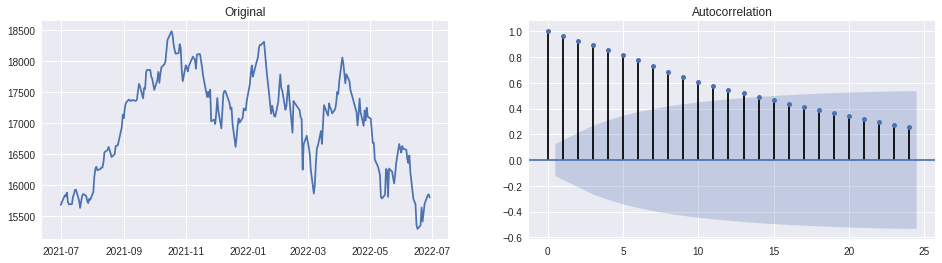

<IPython.core.display.Javascript object>

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(nifty_50.Close)
ax1.set_title("Original")
plot_acf(nifty_50.Close, ax=ax2);

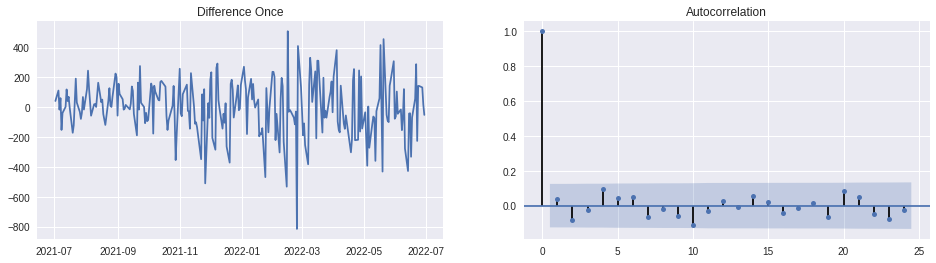

<IPython.core.display.Javascript object>

In [19]:
diff = nifty_50.Close.diff().dropna()
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff, ax=ax2);


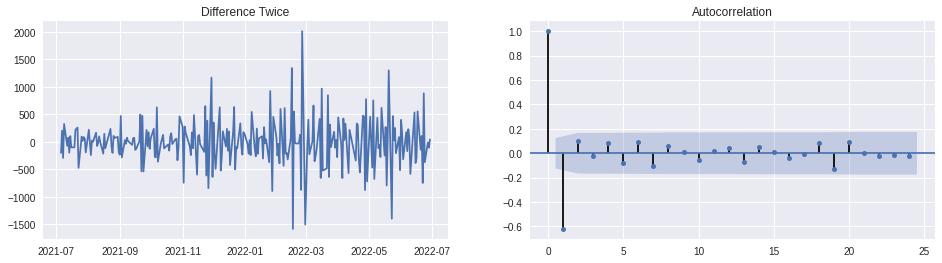

<IPython.core.display.Javascript object>

In [20]:
diff = nifty_50.Close.diff().diff().diff().dropna()
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Twice")
plot_acf(diff, ax=ax2);


In [1]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pmdarima.arima.utils import ndiffs
ndiffs(nifty_50.Close, test="adf")

NameError: ignored

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = nifty_50.Close.diff().dropna()
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(nifty_50.Close, order = (1, 2, 2))
result = model.fit(disp=0)
print(result.summary())



In [ ]:
residuals = pd.DataFrame(result.resid)
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density = True)

In [ ]:
step = 50
fc,se,conf = result.forecast(step)
conf

In [ ]:
fc = pd.Series(fc,index = test[ :step].index)
lower = pd.Series(conf[:,0],index = test[:step].index)
upper = pd.Series(conf[:,1], index = test[:step].index)


In [ ]:
plt.figure(figsize= (16,8))
plt.plot(test[:step],label = "actual")
plt.plot(fc,label= "forecast")
plt.fill_between(lower.index,lower,upper,color = "k",alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")